<a href="https://colab.research.google.com/github/rianefm/Aula_PretaLab_09-05/blob/main/Aula_ML_Pretalab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação de imagem


In [ ]:
!wget https://img.freepik.com/fotos-gratis/jovem-mulher-negra-surpresa-com-a-boca-aberta_23-2148183287.jpg

--2025-05-07 22:24:22--  https://img.freepik.com/fotos-gratis/jovem-mulher-negra-surpresa-com-a-boca-aberta_23-2148183287.jpg
Resolving img.freepik.com (img.freepik.com)... 23.216.5.145, 23.216.5.143, 2600:1407:1800::173f:4f98, ...
Connecting to img.freepik.com (img.freepik.com)|23.216.5.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79857 (78K) [image/jpeg]
Saving to: ‘jovem-mulher-negra-surpresa-com-a-boca-aberta_23-2148183287.jpg’

jovem-mulher-negra- 100%[===================>]  77.99K   287KB/s    in 0.3s    

2025-05-07 22:24:23 (287 KB/s) - ‘jovem-mulher-negra-surpresa-com-a-boca-aberta_23-2148183287.jpg’ saved [79857/79857]



In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
from PIL import Image


pipe = pipeline("image-classification", model="google/vit-base-patch32-384", device=0)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [ ]:
imagem = Image.open("jovem-mulher-negra-surpresa-com-a-boca-aberta_23-2148183287.jpg")
res = pipe(imagem)

res

[{'label': 'wig', 'score': 0.780887246131897},
 {'label': 'sombrero', 'score': 0.13633710145950317},
 {'label': 'cowboy hat, ten-gallon hat', 'score': 0.01060372032225132},
 {'label': 'maraca', 'score': 0.004451786633580923},
 {'label': 'bonnet, poke bonnet', 'score': 0.0033342649694532156}]

In [ ]:
# Pipeline para detecção de objetos/pessoas + contexto
detector = pipeline("object-detection", model="facebook/detr-resnet-50")
classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

In [ ]:
# Analisar imagem
imagem = "jovem-mulher-negra-surpresa-com-a-boca-aberta_23-2148183287.jpg"
detections = detector(imagem)  # Detecta pessoas e objetos
person_bbox = [d for d in detections if d['label'] == 'person'][0]  # Pega a pessoa principal

In [ ]:
result = classifier("jovem-mulher-negra-surpresa-com-a-boca-aberta_23-2148183287.jpg")  # Classifica a pessoa
print(result)

[{'label': 'wig', 'score': 0.9078598618507385}, {'label': 'mask', 'score': 0.004473676439374685}, {'label': 'sombrero', 'score': 0.00347369653172791}, {'label': 'maraca', 'score': 0.0030987095087766647}, {'label': 'hair spray', 'score': 0.0019782267045229673}]


In [ ]:
result = classifier("jovem-mulher-negra-surpresa-com-a-boca-aberta_23-2148183287.jpg")

print("\n🔍 Resultados da Classificação:")
print("=" * 40)
for item in result:
    print(f"🏷️ {item['label'].upper():<30} | 📊 {item['score']*100:.2f}%")
print("=" * 40)


🔍 Resultados da Classificação:
🏷️ WIG                            | 📊 90.79%
🏷️ MASK                           | 📊 0.45%
🏷️ SOMBRERO                       | 📊 0.35%
🏷️ MARACA                         | 📊 0.31%
🏷️ HAIR SPRAY                     | 📊 0.20%


## Vamos treinar Imagens

#Instalação

In [ ]:
pip install torch torchvision matplotlib

# Pasta

In [ ]:
import os

path = "/content/drive/MyDrive/Projeto ML/Dataset-img"
print(os.listdir(path))

#Treinamento de dataset img

In [ ]:
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1. Primeiro, vamos organizar suas imagens
def organize_images(source_dir, target_dir, class_name):
    os.makedirs(os.path.join(target_dir, class_name), exist_ok=True) #Cria a pasta de destino (se não existir):

    for img_file in os.listdir(source_dir): #Percorre todos os arquivos na pasta original:
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp', '.avif')): #Verifica arquivo de imagem
            src = os.path.join(source_dir, img_file) # Caminho original
            dst = os.path.join(target_dir, class_name, img_file) # Caminho novo
            shutil.copy(src, dst) # Copia (não move)

# Caminhos (ajuste conforme seu ambiente)
source_dir_brancas = '/content/drive/MyDrive/Projeto ML/Dataset-img/mulher-branca'
source_dir_pretas = '/content/drive/MyDrive/Projeto ML/Dataset-img/mulher-preta'
target_dir = '/content/dataset_organizado'

# Organizando as imagens
"""
source_dir_brancas

O que é?
É uma variável que armazena o caminho (path) do diretório onde estão armazenadas as imagens originais de mulheres brancas ou pretas.

os.path.join()

O que é?
É uma função do módulo os que combina partes de um caminho de forma correta para qualquer sistema operacional.

target_dir

O que é?
É a variável que armazena o caminho do diretório principal onde as imagens organizadas serão armazenadas.
"""
organize_images(source_dir_brancas, os.path.join(target_dir, 'treinamento'), 'brancas')
organize_images(source_dir_pretas, os.path.join(target_dir, 'treinamento'), 'pretas')


# 2. Agora o treinamento
IMG_SIZE = (224, 224)
BATCH_SIZE = 8  # Reduzi porque tem poucas imagens(Ele vai processar imagem)
EPOCHS = 15 # Uma passagem completa por todo o conjunto de treinamento.

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normaliza os valores dos pixels para [0,1]
    validation_split=0.2, # Reserva 20% dos dados para validação(Divisão treino/validação)
    rotation_range=20, # Rotaciona imagens aleatoriamente até 20 graus
    width_shift_range=0.2, # Desloca imagem horizontalmente (20% da largura)
    height_shift_range=0.2, # Desloca imagem verticalmente (20% da altura)
    horizontal_flip=True # Inverte imagem horizontalmente aleatoriamente (Flip horizontal)
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, 'treinamento'), # Pasta com imagens
    target_size=IMG_SIZE,   # Redimensiona imagens
    batch_size=BATCH_SIZE,  # Número de imagens por lote
    class_mode='binary',  # Classificação binária
    subset='training' # Usa parte de treino (80%)
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, 'treinamento'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'  # Usa parte de validação (20%)
)

# Modelo simples
# Definição da arquitetura do modelo
model = Sequential([
    # Primeira camada convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2), # Redução de dimensionalidade
    Conv2D(64, (3, 3), activation='relu'),  # Segunda camada convolucional
    MaxPooling2D(2, 2),
    Flatten(), # Preparação para camadas densas(Transforma matriz em vetor)
    Dense(128, activation='relu'), # Camada densa (fully connected)
    Dense(1, activation='sigmoid') # Camada de saída (classificação binária)
])

# Configuração do processo de treinamento
model.compile(
    optimizer='adam',  # Otimizador eficiente
    loss='binary_crossentropy', # Função de perda para classificação binária
    metrics=['accuracy'] # Métrica a ser monitorada
)

# Treinamento
history = model.fit(
    train_generator, # Dados de treino
    validation_data=validation_generator, # Dados de validação
    epochs=EPOCHS # Número de épocas
)


# Salvar modelo
model.save('modelo_classificacao_racial.h5')

Found 20 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5250 - loss: 3.7797 - val_accuracy: 0.5000 - val_loss: 1.8184
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4792 - loss: 1.2797 - val_accuracy: 0.5000 - val_loss: 0.9318
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7167 - loss: 0.9363 - val_accuracy: 0.5000 - val_loss: 0.9091
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5708 - loss: 0.7916 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7063 - loss: 0.6188 - val_accuracy: 0.7500 - val_loss: 0.6768
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6542 - loss: 0.6471 - val_accuracy: 0.5000 - val_loss: 0.7323
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5708 - loss: 0.5775 - val_accuracy: 0.5000 - val_loss: 0.7021
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5646 - loss: 0.5751 - val_accuracy: 0.5000 - val_loss: 0.6336
Epoch 9/15
3/3 ━

# Extração de Features com MobileNetV2 + Classificador Binário

In [ ]:
# Importa a arquitetura MobileNetV2 pré-treinada
from tensorflow.keras.applications import MobileNetV2

# Carrega o modelo base MobileNetV2 com pesos pré-treinados no ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # Usa pesos treinados no ImageNet(Remove a última camada (classificação original e define o formato de entrada das imagens)
base_model.trainable = False # Os pesos não serão atualizados durante o treino

# Cria um novo modelo sequencial
model = Sequential([
    base_model,  # Extrai features das imagens
    Flatten(), # Transforma os features em vetor
    Dense(128, activation='relu'), # Adiciona capacidade de aprendizado
    Dense(1, activation='sigmoid') # Saída entre 0 e 1 (probabilidade)
])

# Testando Modelo


Testando imagem: https://www.minhavidamagnolia.com.br/wp-content/uploads/2024/07/Branca-Rubas-apresenta-o-Inspira-Mulher-Business-Club.png


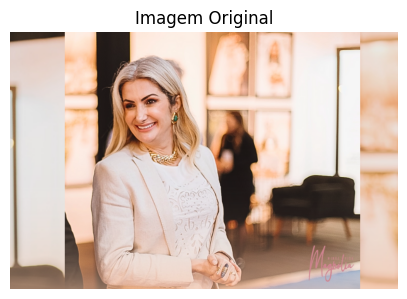

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step

Resultado da Classificação:
Classe Predita: Branca
Confiança: 77.98%
Probabilidade Branca: 77.98%
Probabilidade Preta: 22.02%
Resultado: Branca (Confiança: 77.98%)

Testando imagem: https://paesadvogados.com.br/wp-content/uploads/2022/05/pardo.jpg


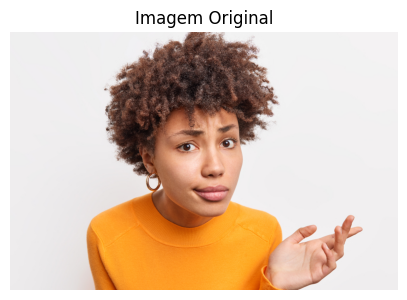

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step

Resultado da Classificação:
Classe Predita: Preta
Confiança: 98.65%
Probabilidade Branca: 1.35%
Probabilidade Preta: 98.65%
Resultado: Preta (Confiança: 98.65%)


In [ ]:
from PIL import Image

# Carregar o modelo treinado
model = load_model('modelo_classificacao_racial.h5')

# Função para processar imagem da internet
def test_image_from_url(img_url):
    try:
        # Baixar a imagem
        response = requests.get(img_url) # Timeout de 10 segundos
        img = Image.open(BytesIO(response.content)) # Verifica erros HTTP

        # Converte para RGB caso seja PNG, RGBA, etc.
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Mostrar a imagem original
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Imagem Original')
        plt.show()

        # Pré-processamento
        img = img.resize((224, 224)) # Redimensiona para o tamanho esperado pelo modelo
        img_array = image.img_to_array(img) # Converte para array numpy
        img_array = np.expand_dims(img_array, axis=0) # Adiciona dimensão do batch
        img_array /= 255.0  # Normaliza pixels para [0,1]

        # Fazer a predição
        prediction = model.predict(img_array) # Suprime logs
        prob_branca = 1 - prediction[0][0] # Probabilidade da classe 'preta'
        prob_preta = prediction[0][0] # Probabilidade complementar

        # Determinar a classe
        if prob_branca > prob_preta:
            classe = "Branca"
            confidence = prob_branca
        else:
            classe = "Preta"
            confidence = prob_preta

        # Mostrar resultados
        print("\nResultado da Classificação:")
        print(f"Classe Predita: {classe}")
        print(f"Confiança: {confidence:.2%}")
        print(f"Probabilidade Branca: {prob_branca:.2%}")
        print(f"Probabilidade Preta: {prob_preta:.2%}")

        return {
            'class': classe,
            'confidence': float(confidence),
            'probabilities': {
                'branca': float(prob_branca),
                'preta': float(prob_preta)
            }
        }

    except Exception as e:
        print(f"Erro ao processar a imagem: {e}")
        return None

# Exemplos de URLs para testar (substitua por URLs reais)
test_urls = [
    "https://www.minhavidamagnolia.com.br/wp-content/uploads/2024/07/Branca-Rubas-apresenta-o-Inspira-Mulher-Business-Club.png",  # URL de mulher branca
    "https://paesadvogados.com.br/wp-content/uploads/2022/05/pardo.jpg",   # URL de mulher preta

]

# Testar cada URL
for url in test_urls:
    print(f"\nTestando imagem: {url}")
    result = test_image_from_url(url)
    if result:
        print(f"Resultado: {result['class']} (Confiança: {result['confidence']:.2%})")